In [124]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

In [125]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
df.shape

(891, 12)

In [128]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
df.drop(columns = ['Name','Ticket', 'Cabin', 'PassengerId'], inplace = True)

In [130]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [131]:
df.shape

(891, 8)

In [132]:
def impute_age(col):
    age = col[0]
    pclass = col[1]
    if pd.isnull(age) : 
        return df[df['Pclass'] == pclass]['Age'].mean()
    else:
        return age
    
df.Age = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [133]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [134]:
df.Sex = df.Sex.map({'male' : 0, 'female' : 1})

In [135]:
encoder = OneHotEncoder(drop = 'first', sparse_output=False)
df.Embarked = encoder.fit_transform(df[['Embarked']])

In [136]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [137]:
x = df.drop(['Survived'], axis = 1)
y = df['Survived']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [138]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

normal logistic regression

In [139]:
# normal logistic regression
model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy_score(ytest, ypred)

0.8100558659217877

<AxesSubplot: >

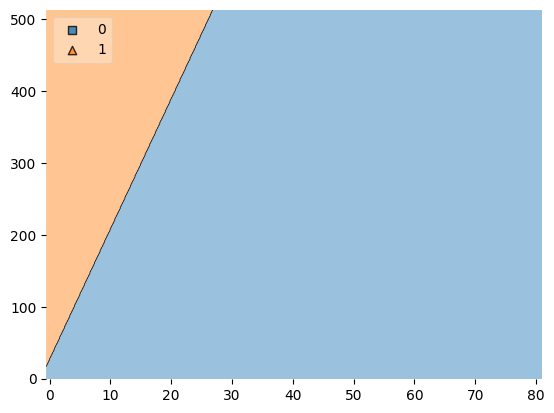

In [140]:
# decision boundary of logistic regression

# 'x' should contain not more than 2 features.
# if 'x' has more than 2 features, you can either use PCA to convert it to 2 features
# or you can manually select only 1 or 2 features from 'x' as pass rest features as filler features.

value=2.5
width=1.25
plot_decision_regions(np.array(x), np.array(y), 
                      clf = model,
                      legend=2, 
                      feature_index=[2, 5],
                      filler_feature_ranges={0 : width, 1 : width, 3 : width, 4 : width, 6 : width}, 
                      filler_feature_values={0 : value, 1 : value, 3 : value, 4 : value, 6 : value})


polynomial logistic regression

In [144]:
poly = PolynomialFeatures(degree=3)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

# NOTE : use hyperparameter tuning to find optimal degree value.

In [145]:
clf = LogisticRegression()
clf.fit(xtrain_poly, ytrain)
clf.score(xtest_poly, ytest)

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.776536312849162